In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge, LinearRegression

In [83]:
X = np.load('./data3_x.npy')
y = np.load('./data3_y.npy')

alphas=np.arange(10e-3, 10, 10e-3)

In [84]:
ridge_model = Ridge(max_iter=10000)
lasso_model = Lasso(max_iter=10000)

ridge_coefficients = None
lasso_coefficients = None


for alpha in alphas:
    ridge_model.alpha = alpha
    lasso_model.alpha = alpha

    ridge_model.fit(X, y)
    lasso_model.fit(X, y)

    ridge_coef = ridge_model.coef_
    lasso_coef = np.expand_dims(lasso_model.coef_, 0)

    if type(ridge_coefficients) != np.ndarray:
        ridge_coefficients = ridge_coef
        lasso_coefficients = lasso_coef
    else:
        ridge_coefficients = np.concatenate((ridge_coefficients, ridge_coef), axis=0)
        lasso_coefficients = np.concatenate((lasso_coefficients, lasso_coef), axis=0)
        
        


In [95]:
LS_model = LinearRegression()
LS_model.fit(X, y)

c1 = LS_model.coef_[0][0]
c2 = LS_model.coef_[0][1]
c3 = LS_model.coef_[0][2]
print(c1,c2,c3)

c1 = np.ones(len(alphas)) * c1
c2 = np.ones(len(alphas)) * c2
c3 = np.ones(len(alphas)) * c3



2.9387892090341876 0.06479680107921437 1.425221555889576


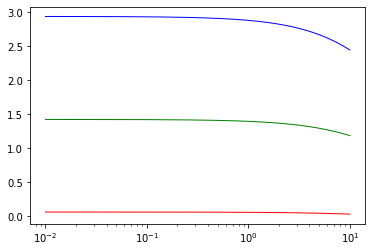

In [88]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rf1 = ax.plot(alphas, ridge_coefficients[:,0], color='blue', lw=1)
rf2 = ax.plot(alphas, ridge_coefficients[:,1], color='red', lw=1)
rf3 = ax.plot(alphas, ridge_coefficients[:,2], color='green', lw=1)

ax.plot(alphas, ridge_coefficients[:,2], color='green', lw=1)
ax.plot(alphas, ridge_coefficients[:,2], color='green', lw=1)
ax.plot(alphas, ridge_coefficients[:,2], color='green', lw=1)


ax.plot(1)

ax.set_xscale('log')
plt.show()

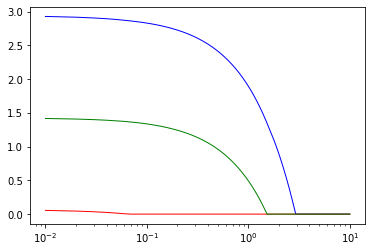

In [80]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

lf1 = ax.plot(alphas, lasso_coefficients[:,0], color='blue', lw=1)
lf2 = ax.plot(alphas, lasso_coefficients[:,1], color='red', lw=1)
lf3 = ax.plot(alphas, lasso_coefficients[:,2], color='green', lw=1)

ax.set_xscale('log')
plt.show()